<a href="https://colab.research.google.com/github/dkarakost/MBE_project/blob/Dimitrios/fruit_detectionD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

if torch.__version__ != '2.5.1+cu124':
    !pip install torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124 -U --quiet
    print("PyTorch version updated to 2.5.1.")
else:
    print("PyTorch is already at the correct version (2.5.1).")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 116.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 101.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 116.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install d2l==1.0.3 --quiet
!pip install scipy --quiet
!pip install torchmetrics --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sour

`Now restart the runtime for the pytorch version change to take effect.`

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.stack.imgur.com%2FHGSSh.png&f=1&nofb=1&ipt=3138d8a64cabb6532ff6bd6bd61aede311aec0aaa97fddc911980eee8da014b8&ipo=images" width=800></center>

In [1]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision.transforms import ToPILImage
from torch import nn
from torch.nn import functional as F
from PIL import ImageFile, Image
import matplotlib.pyplot as plt
from object_detection_utils import ResizeWithBBox, plot_bbox, plot_grid, box_xyxy_to_cxcywh, box_xywh_to_xyxy
import random
import cv2

In [2]:
from google.colab import drive # the Google Drive is mounted to gain access
drive.mount('/content/drive')

Mounted at /content/drive


# Download the dataset
First, let's download the dataset. It consists of images of plant, bounding box annotations, and leaf counts annotations.

In [3]:
!git clone https://git.wur.nl/abe-datasets/education/fruit-detection-challenge.git

Cloning into 'fruit-detection-challenge'...
remote: Enumerating objects: 2010, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2010 (delta 2), reused 0 (delta 0), pack-reused 2004 (from 1)
Receiving objects: 100% (2010/2010), 255.89 MiB | 18.13 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (1958/1958), done.


## The COCO dataset format

The labels for this detection dataset are stored using the COCO JSON format. COCO JSON is a data format used for object detection, segmentation, and keypoint annotation in images. It includes metadata like image paths, annotations, categories, and licenses, typically structured into keys such as "images," "annotations," "categories," and more.

Example structure:
```json
{
  "images": [
    {
      "id": 1,
      "width": 640,
      "height": 480,
      "file_name": "image1.jpg",
      "license": 1,
      "date_captured": "2023-10-01"
    }
  ],
  "annotations": [
    {
      "id": 1,
      "image_id": 1,
      "category_id": 1,
      "bbox": [50, 70, 80, 60],
      "area": 4800,
      "segmentation": [[121.39,215.89,...]],
      "iscrowd": 0
    }
  ],
  "categories": [
    {
      "id": 1,
      "name": "cat",
      "supercategory": "animal"
    },
    {
      "id": 2,
      "name": "dog",
      "supercategory": "animal"
    }
  ]
}
```

Let's open the `train.json` file and explore it:

In [4]:
!git clone https://git.wur.nl/abe-datasets/education/fruit-detection-challenge.git

fatal: destination path 'fruit-detection-challenge' already exists and is not an empty directory.


In [5]:
import json

json_path = "fruit-detection-challenge/detection/annotations/train.json"

with open(json_path, 'r') as f:
    data = json.load(f)

print(data.keys())
print(f"Number of images: {len(data['images'])}")
print(f"Number of annotations: {len(data['annotations'])}")
print(f"Number of categories: {len(data['categories'])}")
print(f"Categories: {data['categories']}")
print(f"Example image: {data['images'][0]}")
print(f"Example annotation: {data['annotations'][0]}")

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
Number of images: 218
Number of annotations: 1603
Number of categories: 4
Categories: [{'id': 1, 'name': 'apple', 'supercategory': ''}, {'id': 2, 'name': 'banana', 'supercategory': ''}, {'id': 3, 'name': 'orange', 'supercategory': ''}, {'id': 4, 'name': 'pear', 'supercategory': ''}]
Example image: {'id': 1, 'file_name': 'scene 1_color_001.png', 'width': 1280, 'height': 720, 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': ''}
Example annotation: {'id': 1, 'image_id': 1, 'category_id': 2, 'bbox': [463.0, 197.0, 294.0, 282.0], 'area': 25736.5, 'iscrowd': 0, 'ignore': 0, 'segmentation': [[702.0, 200.0, 691.0, 197.0, 681.0, 198.0, 673.0, 206.0, 666.0, 223.0, 667.0, 233.0, 672.0, 240.0, 675.0, 242.0, 686.0, 243.0, 696.0, 254.0, 703.0, 268.0, 706.0, 280.0, 706.0, 288.0, 704.0, 293.0, 699.0, 300.0, 681.0, 338.0, 669.0, 354.0, 657.0, 365.0, 635.0, 380.0, 596.0, 398.0, 553.0, 410.0, 522.0, 416.0, 494.0, 429.0

In [6]:
import os
import random
from PIL import Image
from object_detection_utils import plot_bbox

json_path = "fruit-detection-challenge/detection/annotations/train.json"
image_folder = "fruit-detection-challenge/detection/train/"

with open(json_path, 'r') as f:
    data = json.load(f)

images = data['images']
random_image_info = random.choice(images) # Select a random image from the images list in JSON
image_id = random_image_info['id']
image_path = os.path.join(image_folder, random_image_info['file_name'])
print(f"Selected image: {image_path}")

img = Image.open(image_path)

boxes = []
labels = []

for annotation in data['annotations']:
    if annotation['image_id'] == image_id:
        bbox = annotation['bbox']
        x, y, w, h = bbox  # COCO box format is [x, y, width, height]
        center_x = x + w / 2.0
        center_y = y + h / 2.0
        boxes.append((center_x, center_y, w, h))
        labels.append(annotation['category_id'] - 1) # COCO category IDs start from 1, so we subtract 1 to make it zero-indexed

print(f"Boxes: {boxes}")
print(f"Labels: {labels}")

img_with_bboxes = plot_bbox(img.copy(), boxes, labels)
img_with_bboxes.show()

Selected image: fruit-detection-challenge/detection/train/scene 4_color_006.png
Boxes: [(1091.5, 447.5, 375.0, 233.0), (918.0, 254.0, 192.0, 174.0), (552.0, 314.0, 168.0, 166.0), (674.5, 435.0, 181.0, 184.0), (862.5, 106.0, 177.0, 168.0)]
Labels: [1, 0, 2, 2, 2]


Let's explore the labels for the two-step method.

In [7]:
json_path = "fruit-detection-challenge/detection/annotations/train_one_class.json"

with open(json_path, 'r') as f:
    data = json.load(f)

print(data.keys())
print(f"Number of images: {len(data['images'])}")
print(f"Number of annotations: {len(data['annotations'])}")
print(f"Number of categories: {len(data['categories'])}")
print(f"Categories: {data['categories']}")
print(f"Example image: {data['images'][0]}")
print(f"Example annotation: {data['annotations'][0]}")

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
Number of images: 218
Number of annotations: 1603
Number of categories: 1
Categories: [{'id': 1, 'name': 'fruit', 'supercategory': ''}]
Example image: {'id': 1, 'file_name': 'scene 1_color_001.png', 'width': 1280, 'height': 720, 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': ''}
Example annotation: {'id': 1, 'image_id': 1, 'category_id': 1, 'bbox': [463.0, 197.0, 294.0, 282.0], 'area': 25736.5, 'iscrowd': 0, 'ignore': 0, 'segmentation': [[702.0, 200.0, 691.0, 197.0, 681.0, 198.0, 673.0, 206.0, 666.0, 223.0, 667.0, 233.0, 672.0, 240.0, 675.0, 242.0, 686.0, 243.0, 696.0, 254.0, 703.0, 268.0, 706.0, 280.0, 706.0, 288.0, 704.0, 293.0, 699.0, 300.0, 681.0, 338.0, 669.0, 354.0, 657.0, 365.0, 635.0, 380.0, 596.0, 398.0, 553.0, 410.0, 522.0, 416.0, 494.0, 429.0, 487.0, 431.0, 477.0, 431.0, 468.0, 434.0, 465.0, 439.0, 463.0, 454.0, 467.0, 459.0, 491.0, 471.0, 506.0, 476.0, 522.0, 479.0, 562.0, 478.0, 595.0,

In [8]:
json_path = "fruit-detection-challenge/detection/annotations/train_one_class.json"
image_folder = "fruit-detection-challenge/detection/train/"

with open(json_path, 'r') as f:
    data = json.load(f)

images = data['images']
random_image_info = random.choice(images) # Select a random image from the images list in JSON
image_id = random_image_info['id']
image_path = os.path.join(image_folder, random_image_info['file_name'])
print(f"Selected image: {image_path}")

img = Image.open(image_path)

boxes = []
labels = []

for annotation in data['annotations']:
    if annotation['image_id'] == image_id:
        bbox = annotation['bbox']
        x, y, w, h = bbox  # COCO box format is [x, y, width, height]
        center_x = x + w / 2.0
        center_y = y + h / 2.0
        boxes.append((center_x, center_y, w, h))
        labels.append(annotation['category_id'] - 1) # COCO category IDs start from 1, so we subtract 1 to make it zero-indexed

print(f"Boxes: {boxes}")
print(f"Labels: {labels}")

img_with_bboxes = plot_bbox(img.copy(), boxes, labels)
img_with_bboxes.show()

Selected image: fruit-detection-challenge/detection/train/scene 3_color_010.png
Boxes: [(710.5, 444.5, 217.0, 225.0), (560.0, 340.5, 182.0, 173.0), (841.5, 221.5, 173.0, 169.0), (592.5, 207.0, 161.0, 154.0), (938.5, 343.5, 195.0, 193.0), (732.5, 146.0, 165.0, 122.0)]
Labels: [0, 0, 0, 0, 0, 0]


# The `Dataset` class from COCO json data
Now, let's create a dataset customized to our data.
We will call it `FruitDetectionDataset`. You need to define three methods (as you should aready know): the constructor `__init__`, `__get_item__` and `__len__`.

In [41]:
from ctypes import resize
import json
import os
import torch
# TODO: add needed imports

class FruitDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, json_path, img_folder, img_size, transforms=None):
        """
        Constructor of the FruitDetectionDataset
        :param json_path: Path to the COCO JSON file
        :param img_folder: Folder containing the images
        :param img_size: Size to resize the images
        :param transforms: List of transformations to be applied to the data
        """
        self.img_folder = img_folder
        self.transforms = transforms
        self.resize = ResizeWithBBox(img_size)

        with open(json_path, 'r') as f:
            coco_data = json.load(f)

        # TODO: Extract image info and annotations
        self.images = coco_data['images']
        self.annotations = coco_data['annotations']
        self.categories = coco_data['categories']

        # Mapping from category ID to category index
        # This creates a zero-based index
        self.category_id_to_index = {category['id']: idx for idx, category in enumerate(self.categories)}

        # Mapping from image ID to annotations
        self.img_id_to_annotations = {}
        for annotation in self.annotations:
            img_id = annotation['image_id']
            if img_id not in self.img_id_to_annotations:
                self.img_id_to_annotations[img_id] = []
            self.img_id_to_annotations[img_id].append(annotation)

        # Create a list of image paths
        self.img_files = [os.path.join(img_folder, img['file_name']) for img in self.images]

    def __getitem__(self, idx):
        # TODO Get image path and annotations
        img_info = self.images[idx]
        img_filename = img_info['file_name']
        img_id = img_info['id']
        img_path = os.path.join(self.img_folder, img_filename)
        # Get annotations for the image
        annotations = self.img_id_to_annotations.get(img_id, [])

        # Load image
        img = Image.open(img_path).convert("RGB")  # TODO PIL Image format

        # Extract bounding boxes and labels
        bboxes = []
        labels = []
        for annotation in annotations:
            x, y, width, height = annotation['bbox']
            bboxes.append([x, y, width, height])
            category_id = annotation['category_id']
            labels.append(self.category_id_to_index[category_id])


        bboxes = torch.tensor(bboxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        if len(bboxes.shape) == 1:
            bboxes = bboxes.unsqueeze(0)

        # TODO: Resize image and boxes

        image, bboxes = self.resize(image=img, boxes=bboxes)


        # TODO: Convert boxes to center x, center y, width, height format
        cxcywh_boxes = []
        for box in bboxes:
          x, y, w, h = box
          center_x = x + w / 2.0
          center_y = y + h / 2.0

          cxcywh_boxes.append([center_x, center_y, w, h])


        cxcywh_boxes = torch.tensor(cxcywh_boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)
        # Apply other transforms
        if self.transforms:
            image = self.transforms(image)

        # TODO Add illegal boxes if needed
        illegal_needed = max(0, 30 - len(cxcywh_boxes))

        illegal_labels = torch.ones((illegal_needed,), dtype=torch.int64) * -1

        illegal_boxes = torch.zeros((illegal_needed, 4), dtype=torch.float32)
        return image, {
            "labels": torch.cat((labels, illegal_labels)),
            "boxes": torch.cat((cxcywh_boxes, illegal_boxes), axis=0),
        }

    def __len__(self): # TODO
        return len(self.images)



This dataset should allow you to develop your object detection algorithm for both methods (two-stage with one class and single stage with 4 classes)

## Two-step approach
The two-step approach consists of a generic fruit detector plus a fruit classifier. You can use `FruitDetectionDataset` to train your generic fruit detector. However, we need a different dataset for your classifier. To help you, we've already cropped all the fruits from the training and validation images and store them in a folder. Let's explore it.

In [28]:
import torchvision


data_dir = "fruit-detection-challenge/classification"

train_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train'))
val_imgs = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'val'))

In [11]:
train_imgs.classes

['apple', 'banana', 'orange', 'pear']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

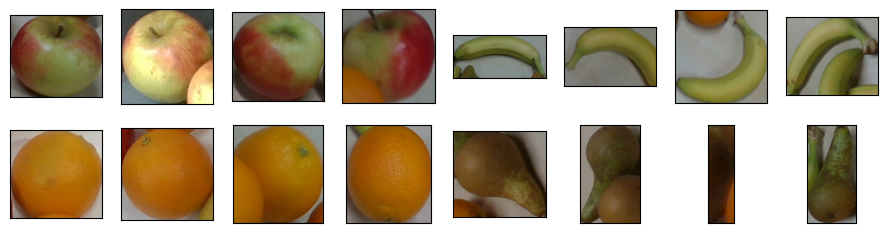

In [29]:
from d2l import torch as d2l

class_names = train_imgs.classes
images = []

for i in range(len(train_imgs.classes)):
    class_idx = i % len(class_names)
    class_name = class_names[class_idx]
    class_images = [img for img, label in train_imgs if label == class_idx]
    for i in range(4): # Select 4 random images from the class
        images.append(random.choice(class_images))

d2l.show_images(images, 2, 8, scale=1.4)


## Creating submission `.txt` file
The submission format should be a txt file as follow where predicted boxes are presented as `image_filename, cx, cy, w, h, class_id, confidence. This is an example:

```
color_001.png, 0.9385692477226257, 0.12406756728887558, 0.15019071102142334, 0.22750574350357056, 3, 0.9989498257637024
color_002.png, 0.699505090713501, 0.38808369636535645, 0.25795409083366394, 0.4329442083835602, 2, 0.9999927282333374
color_002.png, 0.8748611807823181, 0.6965410709381104, 0.15483522415161133, 0.2767787575721741, 3, 0.9996340274810791
color_003.png, 0.5620995163917542, 0.36693891882896423, 0.3271831274032593, 0.43740174174308777, 2, 0.9999911785125732
color_004.png, 0.7048399448394775, 0.5529986619949341, 0.19585376977920532, 0.29669857025146484, 3, 0.9999991655349731
color_004.png, 0.6807190775871277, 0.18781284987926483, 0.18665297329425812, 0.3028806447982788, 3, 0.9999967813491821
color_004.png, 0.8595101237297058, 0.360429972410202, 0.2043967992067337, 0.3125438988208771, 3, 0.9999872446060181
color_005.png, 0.5389502048492432, 0.5513347387313843, 0.18025022745132446, 0.3195890188217163, 3, 0.9999912977218628
color_005.png, 0.5121865272521973, 0.2852896749973297, 0.1954585462808609, 0.274965763092041, 3, 0.9999532699584961
color_006.png, 0.25715094804763794, 0.9217860102653503, 0.17427219450473785, 0.1739407777786255, 2, 0.9999980926513672
````

We provide you some starting code for this in the next cell.


In [42]:
from object_detection_utils import predict

def predict_test_submission(model, test_dataset, output_txt_path, img_size, score_threshold=0.3, nms_threshold=0.3):
    """
    Predict bounding boxes for all images in the test dataset and save to a text file:
      file_name, cx, cy, w, h, label, score
    """
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with open(output_txt_path, "w") as out_file:
        for i in range(len(test_dataset)):
            img_path = test_dataset.img_files[i]
            pil_img = Image.open(img_path).convert("RGB")
            tensor_img = ...
            boxes, scores, top_class = predict(model, tensor_img, score_threshold, nms_threshold)
            # Write results
            file_name = os.path.basename(img_path)
            for box, lbl, sc in zip(boxes, top_class, scores):
                box = box / img_size
                cx, cy, w, h = box.tolist()
                out_file.write(f"{file_name}, {cx}, {cy}, {w}, {h}, {lbl.item()+1}, {sc.item()}\n") # submission expects 1-based indexing for labels

    print(f"Predictions saved to {output_txt_path}")

## Testing your code before submitting using the validation set
We provide you with the validation set in the same `.txt` format used in the submission file. Check it here `fruit-detection-challenge/detection/annotations/val.txt`.

We also provide you with the code that the submission server uses to calculate AP performance. You can find it in `object_detection_utils.py` with name `FileBasedAPCalculator`. Let's see how to use it.

Let's first create a noisy version of our ground truth `val.txt` for this demonstration.

In [30]:
import numpy as np

def add_noise_to_box(box_coords, noise_factor=0.1):
    noisy_box = []
    for coord in box_coords:
        noisy_coord = np.random.normal(loc=coord, scale=noise_factor * coord)
        noisy_box.append(max(0, min(noisy_coord, 1)))  # Ensure the values are within [0, 1]
    return noisy_box

def remove_random_predictions(predictions, removal_fraction=0.2):
    num_predictions = len(predictions)
    indices_to_remove = np.random.choice(num_predictions, size=int(removal_fraction * num_predictions), replace=False)
    remaining_predictions = [pred for i, pred in enumerate(predictions) if i not in indices_to_remove]
    return remaining_predictions

def process_predictions(file_path):
    predictions = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            image_name = parts[0]
            box_coords = list(map(float, parts[1:5]))
            class_id = int(parts[5])
            confidence = 1.0
            predictions.append((image_name, *box_coords, class_id, confidence))

    noisy_predictions = []
    for pred in predictions:
        image_name, x_center, y_center, width, height, class_id, conf = pred
        noisy_box = add_noise_to_box([x_center, y_center, width, height], 0.05)
        noisy_predictions.append((image_name, *noisy_box, class_id, conf))

    remaining_predictions = remove_random_predictions(noisy_predictions, 0.1)

    return remaining_predictions

def save_processed_predictions(predictions, output_file_path):
    with open(output_file_path, 'w') as f:
        for pred in predictions:
            line = ','.join(map(str, pred))
            f.write(line + '\n')



In [15]:
from object_detection_utils import FileBasedAPCalculator

val_gt = "fruit-detection-challenge/detection/annotations/val.txt"

noisy_val_gt = 'processed_predictions.txt'

predictions = process_predictions(val_gt)
save_processed_predictions(predictions, noisy_val_gt)


ap_calculator = FileBasedAPCalculator(
    val_gt,
    noisy_val_gt,
)
ap = ap_calculator.calculate_map()
print(f"AP: {ap['map'].item():.4f}")
print(f"AP@50: {ap['map_50'].item():.4f}")
print(f"AP@75: {ap['map_75'].item():.4f}")
print(f"AP (small): {ap['map_small'].item():.4f}")
print(f"AP (medium): {ap['map_medium'].item():.4f}")
print(f"AP (large): {ap['map_large'].item():.4f}")
print(f"AR@1: {ap['mar_1'].item():.4f}")
print(f"AR@10: {ap['mar_10'].item():.4f}")
print(f"AR@100: {ap['mar_100'].item():.4f}")
print(f"AR (small): {ap['mar_small'].item():.4f}")
print(f"AR (medium): {ap['mar_medium'].item():.4f}")
print(f"AR (large): {ap['mar_large'].item():.4f}")
print(f"AP per class: {ap['map_per_class']}")
print(f"AR@100 per class: {ap['mar_100_per_class']}")
print(f"Classes: {ap['classes']}")

AP: 0.1917
AP@50: 0.5678
AP@75: 0.0904
AP (small): 0.1917
AP (medium): -1.0000
AP (large): -1.0000
AR@1: 0.1703
AR@10: 0.2823
AR@100: 0.2823
AR (small): 0.2823
AR (medium): -1.0000
AR (large): -1.0000
AP per class: tensor([0.1782, 0.3799, 0.0739, 0.1348])
AR@100 per class: tensor([0.2520, 0.4706, 0.1667, 0.2400])
Classes: tensor([1, 2, 3, 4], dtype=torch.int32)


**Now you can start with the challenge!**

In [31]:
from torchvision import datasets, transforms

data_dir = "/content/fruit-detection-challenge/classification"

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(data_dir, 'val'), transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)


In [32]:
class_names = train_dataset.classes
print("Classes:", class_names)


Classes: ['apple', 'banana', 'orange', 'pear']


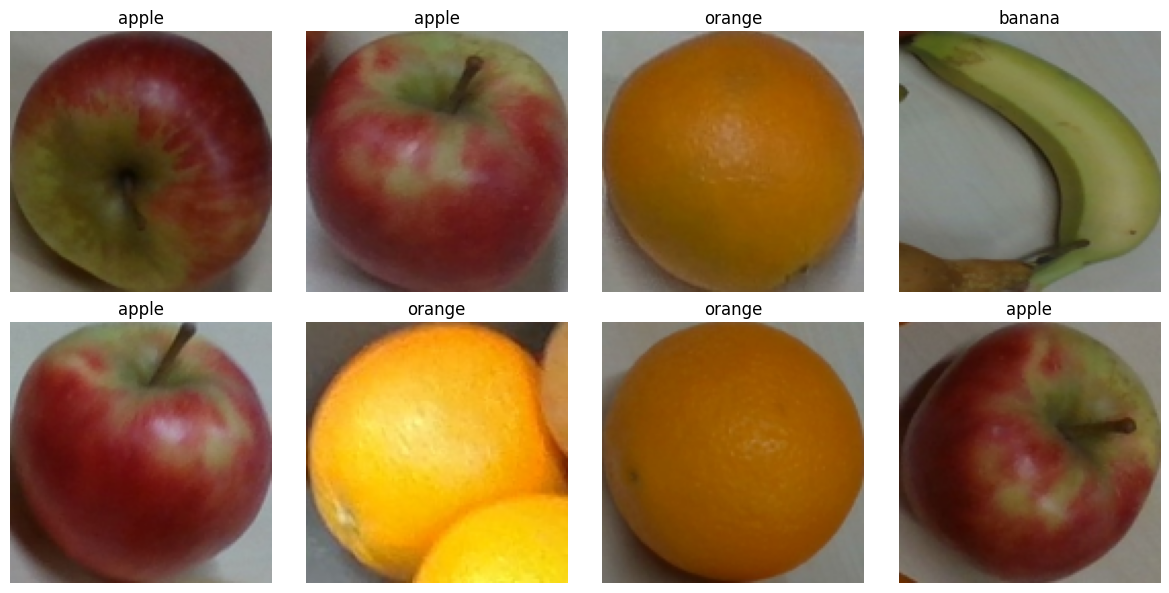

In [33]:
import matplotlib.pyplot as plt

def imshow(img, title):
    img = img.permute(1, 2, 0).numpy()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

images, labels = next(iter(train_loader))
plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    imshow(images[i], class_names[labels[i]])
plt.tight_layout()
plt.show()


In [39]:
json_path = "/content/fruit-detection-challenge/detection/annotations/train.json"
img_folder = "/content/fruit-detection-challenge/detection/train/"  # adjust if your image path is different
img_size = 256  # or whatever size you're using

# Create your transforms
augs = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
])

training_set = FruitDetectionDataset(
    json_path=json_path,
    train_folder=img_folder,
    img_size=image_size,
    transforms=augs)

TypeError: FruitDetectionDataset.__init__() got an unexpected keyword argument 'train_folder'

<ipython-input-41-3bf1d12fa081>:87: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.int64)


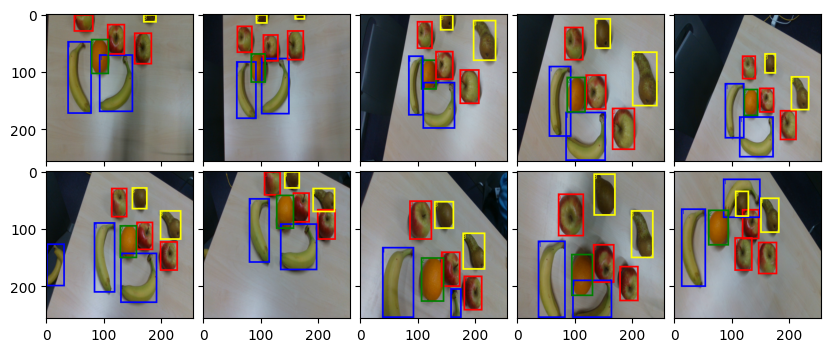

In [43]:
#this is the datatset for detecter
json_path="fruit-detection-challenge/detection/annotations/train.json"
train_folder="fruit-detection-challenge/detection/train/"

image_size=256
batch_size=32
#augs = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

training_set=FruitDetectionDataset(json_path,train_folder,img_size=(image_size, image_size),)
img,target=training_set[0]

# print("Type of img:", type(img))
# print("Type of target:", type(target))
display_imgs_bbox = []
# print("output of the dataset:",target)
max_boxes = max(len(training_set.img_id_to_annotations[img['id']]) for img in training_set.images)
# print("Maximum boxes in one image:", max_boxes)
for i in range(10):
    img, target =training_set[i]

    labels = target["labels"]
    boxes = target["boxes"]
    img = plot_bbox(img, boxes[labels != -1] * image_size, labels[labels != -1].numpy())
    display_imgs_bbox.append(img)

# Plot two grids, one per list (don't forget the functions declared in the beginning of this notebook)
plot_grid(imgs=display_imgs_bbox, nrows=2, ncols=5)

#chatmodel implementation

In [60]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import os
import json
from PIL import Image

# For the detector (bounding box prediction)
class FruitDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, json_path, img_folder, img_size=256, transforms=None):
      self.img_folder = img_folder
      self.img_size = img_size  # Store the target size

      # Standard transforms that will always be applied
      self.base_transforms = [
          transforms.Resize((img_size, img_size)),  # Fixed size resize
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
      ]

      # Combine with additional transforms if provided
      if transforms is not None:
          if isinstance(transforms, list):
              self.base_transforms = transforms + self.base_transforms
          else:
              self.base_transforms = [transforms] + self.base_transforms

      # Create final transform composition
      self.transform = transforms.Compose(self.base_transforms)

      # Load COCO annotations
      with open(json_path, 'r') as f:
          coco_data = json.load(f)

      self.images = coco_data['images']
      self.annotations = coco_data['annotations']
      self.categories = {cat['id']: cat['name'] for cat in coco_data['categories']}

      # Create mapping from image_id to its annotations
      self.img_id_to_annotations = {}
      for ann in self.annotations:
          img_id = ann['image_id']
          if img_id not in self.img_id_to_annotations:
              self.img_id_to_annotations[img_id] = []
          self.img_id_to_annotations[img_id].append(ann)
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
      img_info = self.images[idx]
      img_path = os.path.join(self.img_folder, img_info['file_name'])
      img = Image.open(img_path).convert("RGB")

      # Get original dimensions for box scaling
      orig_width, orig_height = img_info['width'], img_info['height']

      # Apply transforms (changed from base_transform to transform)
      img = self.transform(img)  # This is the correct line

      # Rest of your __getitem__ implementation...
      annotations = self.img_id_to_annotations.get(img_info['id'], [])
      boxes = []
      labels = []

      for ann in annotations:
          x, y, w, h = ann['bbox']
          boxes.append([x, y, x+w, y+h])
          labels.append(ann['category_id'] - 1)  # Make 0-indexed

      boxes = torch.as_tensor(boxes, dtype=torch.float32)
      labels = torch.as_tensor(labels, dtype=torch.int64)

      if len(boxes) > 0:
          boxes[:, [0, 2]] *= (self.img_size / orig_width)
          boxes[:, [1, 3]] *= (self.img_size / orig_height)

      target = {
          "boxes": boxes,
          "labels": labels,
          "image_id": torch.tensor([img_info['id']]),
          "orig_size": torch.tensor([orig_height, orig_width]),
          "size": torch.tensor([self.img_size, self.img_size])
      }

      return img, target

# For the classifier (fruit type prediction)
data_dir = "fruit-detection-challenge/classification"
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'train'), transform=transform)
val_dataset = torchvision.datasets.ImageFolder(
    os.path.join(data_dir, 'val'), transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [21]:
import torch.nn as nn
import torchvision.models as models

class PredictionHead(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        # Feature processing
        self.feature_processor = nn.Sequential(
            nn.Conv2d(in_channels, in_channels//2, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels//2),
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels//2, in_channels//4, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels//4),
            nn.LeakyReLU(0.1),
        )

        # Box prediction branch
        self.box_predictor = nn.Sequential(
            nn.Conv2d(in_channels//4, in_channels//8, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels//8),
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels//8, 4, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

        # Class prediction branch
        self.class_predictor = nn.Sequential(
            nn.Conv2d(in_channels//4, in_channels//8, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels//8),
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels//8, num_classes, kernel_size=3, padding=1)
        )

        # Objectness prediction branch
        self.objectness_predictor = nn.Sequential(
            nn.Conv2d(in_channels//4, in_channels//8, kernel_size=3, padding=1),
            nn.BatchNorm2d(in_channels//8),
            nn.LeakyReLU(0.1),
            nn.Conv2d(in_channels//8, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Process features
        features = self.feature_processor(x)
        batch_size, _, height, width = features.shape

        # Create grid coordinates
        grid_y, grid_x = torch.meshgrid(
            torch.arange(height, device=x.device),
            torch.arange(width, device=x.device),
            indexing="ij"
        )

        # Normalize grid to [0,1] range
        grid_x = grid_x.float() / width
        grid_y = grid_y.float() / height

        # Get predictions
        bbox_pred = self.box_predictor(features)  # [B, 4, H, W]
        cls_logits = self.class_predictor(features)  # [B, C, H, W]
        objectness_pred = self.objectness_predictor(features)  # [B, 1, H, W]

        # Adjust box predictions with grid offsets
        # Permute to [B, H, W, 4] for easier manipulation
        bbox_pred = bbox_pred.permute(0, 2, 3, 1)

        # Add grid offsets to center predictions
        bbox_pred[..., 0] = bbox_pred[..., 0] + grid_x  # cx
        bbox_pred[..., 1] = bbox_pred[..., 1] + grid_y  # cy
        # w and h remain unchanged

        # Permute back to [B, 4, H, W]
        bbox_pred = bbox_pred.permute(0, 3, 1, 2)

        return cls_logits, bbox_pred, objectness_pred


class ObjectDetector(nn.Module):
    def __init__(self, num_classes=4, pretrained=True):
        super().__init__()
        self.num_classes = num_classes

        # Backbone - ResNet18 up to layer3
        backbone = models.resnet18(pretrained=pretrained)

        # Take everything up to layer3 (which outputs 256 channels)
        self.backbone = nn.Sequential(
            *list(backbone.children())[:6]  # Up to layer2
        )

        # layer3 outputs 256 channels
        self.layer3 = backbone.layer3

        # Prediction head expects 256 input channels
        self.prediction_head = PredictionHead(256, num_classes)



    def forward(self, x):
        # Feature extraction
        assert x.dim() == 4, f"Input must be 4D tensor, got {x.dim()}D"
        _, _, h, w = x.shape
        assert h % 32 == 0 and w % 32 == 0, \
            f"Input dimensions must be divisible by 32, got {h}x{w}"

        features = self.backbone(x)  # [B, 128, H/8, W/8]
        features = self.layer3(features)  # [B, 256, H/16, W/16]

        # Get predictions
        cls_logits, bbox_pred, objectness_pred = self.prediction_head(features)

        # Reshape outputs
        cls_preds = cls_logits.flatten(2, 3).permute(0, 2, 1)  # [B, N, C]
        box_preds = bbox_pred.flatten(2, 3).permute(0, 2, 1)    # [B, N, 4]
        obj_preds = objectness_pred.flatten(2, 3).permute(0, 2, 1)  # [B, N, 1]

        return {
            "pred_logits": cls_preds,
            "pred_boxes": box_preds,
            "pred_objectness": obj_preds
        }

In [45]:
class FruitClassifier(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()
        self.model = models.resnet18(pretrained=True)
        self.model.fc = nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

def train_classifier():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = FruitClassifier(num_classes=4).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss/len(train_loader):.4f}, Val Acc: {100*correct/total:.2f}%")

    return model

classifier_model = train_classifier()

Epoch 1/10, Loss: 0.2963, Val Acc: 93.06%
Epoch 2/10, Loss: 0.1545, Val Acc: 94.44%
Epoch 3/10, Loss: 0.1274, Val Acc: 95.83%
Epoch 4/10, Loss: 0.1749, Val Acc: 98.61%
Epoch 5/10, Loss: 0.1564, Val Acc: 98.61%
Epoch 6/10, Loss: 0.1809, Val Acc: 98.61%
Epoch 7/10, Loss: 0.0735, Val Acc: 98.61%
Epoch 8/10, Loss: 0.0619, Val Acc: 100.00%
Epoch 9/10, Loss: 0.0583, Val Acc: 100.00%
Epoch 10/10, Loss: 0.2316, Val Acc: 98.61%


In [62]:
def train_detector():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Prepare detector dataset
    json_path = "fruit-detection-challenge/detection/annotations/train.json"
    img_folder = "fruit-detection-challenge/detection/train/"

    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    dataset = FruitDetectionDataset(
        json_path=json_path,
        img_folder=img_folder,
        transforms=transform
    )

    # THIS WAS MISSING:
    dataloader = DataLoader(
      dataset,
      batch_size=4,
      shuffle=True,
      num_workers=2,
      collate_fn=lambda x: tuple(zip(*x)))

    model = ObjectDetector(num_classes=4).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    # Loss functions
    cls_criterion = nn.CrossEntropyLoss()
    box_criterion = nn.L1Loss()
    obj_criterion = nn.BCELoss()

    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0

        for images, targets in dataloader:
            images = [img.to(device) for img in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            optimizer.zero_grad()

            # Forward pass
            outputs = model(torch.stack(images))

            # Calculate losses
            cls_loss = 0
            box_loss = 0
            obj_loss = 0

            for i, target in enumerate(targets):
                # Get predictions for this image
                pred_logits = outputs["pred_logits"][i]  # [N, C]
                pred_boxes = outputs["pred_boxes"][i]    # [N, 4]
                pred_obj = outputs["pred_objectness"][i] # [N, 1]

                # Get ground truth
                gt_boxes = target["boxes"]  # [M, 4]
                gt_labels = target["labels"]  # [M]

                if len(gt_boxes) == 0:
                    # No objects in this image
                    # We should predict background for all predictions
                    cls_loss += cls_criterion(pred_logits, torch.zeros(pred_logits.size(0), dtype=torch.long, device=device))
                    obj_loss += obj_criterion(pred_obj.squeeze(), torch.zeros(pred_obj.size(0), device=device))
                    continue

                # Calculate IoU between predictions and ground truth
                # This is simplified - in practice you'd want to match predictions to ground truth
                # using something like Hungarian matching

                # For simplicity, we'll just calculate losses for the best matching prediction
                # per ground truth box

                # Classification loss
                cls_loss += cls_criterion(pred_logits[:len(gt_labels)], gt_labels)

                # Box regression loss (only for matched predictions)
                box_loss += box_criterion(pred_boxes[:len(gt_boxes)], gt_boxes)

                # Objectness loss (1 for objects, 0 for background)
                obj_target = torch.zeros(pred_obj.size(0), device=device)
                obj_target[:len(gt_boxes)] = 1.0
                obj_loss += obj_criterion(pred_obj.squeeze(), obj_target)

            # Total loss
            loss = cls_loss + box_loss + obj_loss
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(dataloader):.4f}")

    return model

detector_model = train_detector()

AttributeError: 'Compose' object has no attribute 'Resize'

Creating predictions from the model

In [ ]:
from object_detection_utils import FileBasedAPCalculator
import numpy as np

def generate_predictions(model, val_json_path, val_img_folder, output_file="predictions.txt"):
    # Set up device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Load validation dataset
    val_dataset = FruitDetectionDataset(
        json_path=val_json_path,
        img_folder=val_img_folder,
        transforms=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
    )

    model.eval()
    predictions = []

    with torch.no_grad():
        for img_info in val_dataset.images:
            img_path = os.path.join(val_img_folder, img_info['file_name'])
            img = Image.open(img_path).convert("RGB")

            # Prepare image tensor
            transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ])
            img_tensor = transform(img).unsqueeze(0).to(device)

            # Get predictions
            outputs = model(img_tensor)

            # Process outputs
            pred_boxes = outputs["pred_boxes"][0].cpu().numpy()  # [N, 4] in cxcywh format
            pred_logits = outputs["pred_logits"][0].cpu().numpy()  # [N, C]
            pred_obj = outputs["pred_objectness"][0].cpu().numpy()  # [N, 1]

            # Filter predictions by confidence
            confidences = pred_obj.squeeze()
            keep = confidences > 0.5  # Confidence threshold

            # Get filtered predictions
            boxes = pred_boxes[keep]
            class_scores = torch.softmax(torch.tensor(pred_logits[keep]), dim=1).numpy()
            class_ids = np.argmax(class_scores, axis=1)
            confidences = confidences[keep]

            # Convert boxes to normalized image coordinates
            img_width, img_height = img.size
            boxes[:, 0] /= img_width  # cx
            boxes[:, 1] /= img_height  # cy
            boxes[:, 2] /= img_width   # w
            boxes[:, 3] /= img_height  # h

            # Save predictions
            for box, class_id, conf in zip(boxes, class_ids, confidences):
                predictions.append((
                    img_info['file_name'],
                    box[0], box[1], box[2], box[3],  # cx, cy, w, h
                    int(class_id) + 1,  # Convert back to 1-indexed
                    float(conf)
                ))

    # Save to file
    with open(output_file, 'w') as f:
        for pred in predictions:
            line = ','.join(map(str, pred))
            f.write(line + '\n')

    return predictions

evaluating

In [ ]:
def evaluate_predictions(pred_file, gt_file="fruit-detection-challenge/detection/annotations/val.txt"):
    # Initialize AP calculator
    ap_calculator = FileBasedAPCalculator(
        iou_threshold=0.5,
        class_names=['apple', 'banana', 'orange', 'pear']
    )

    # Load ground truth
    ap_calculator.load_ground_truth(gt_file)

    # Load predictions
    ap_calculator.load_predictions(pred_file)

    # Calculate AP
    results = ap_calculator.compute_ap()

    # Print results
    print("Evaluation Results:")
    print(f"mAP@0.5: {results['map']:.4f}")
    for class_name, ap in results['ap_per_class'].items():
        print(f"AP for {class_name}: {ap:.4f}")

    return results

In [ ]:
# Define paths
val_json_path = "fruit-detection-challenge/detection/annotations/val.json"
val_img_folder = "fruit-detection-challenge/detection/val/"

# Generate predictions (device will be automatically determined)
generate_predictions(detector_model, val_json_path, val_img_folder, "my_predictions.txt")

# Evaluate predictions
results = evaluate_predictions("my_predictions.txt")

AttributeError: 'Compose' object has no attribute 'Compose'

AttributeError: 'float' object has no attribute 'shape'